<a href="https://colab.research.google.com/github/ericabgraboyes/project4_team1/blob/kevin2/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [25]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


churn_df = pd.read_csv('https://raw.githubusercontent.com/ericabgraboyes/project4_team1/main/Customer-Churn-Records-clean.csv')

churn_df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [27]:
# # Drop the non-beneficial ID CustomerId, 'Surname' and 'RowNumber'.

churn_df = churn_df.drop(columns=['Complain'])

churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [28]:
# Determine the number of unique values in each column.
churn_df.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

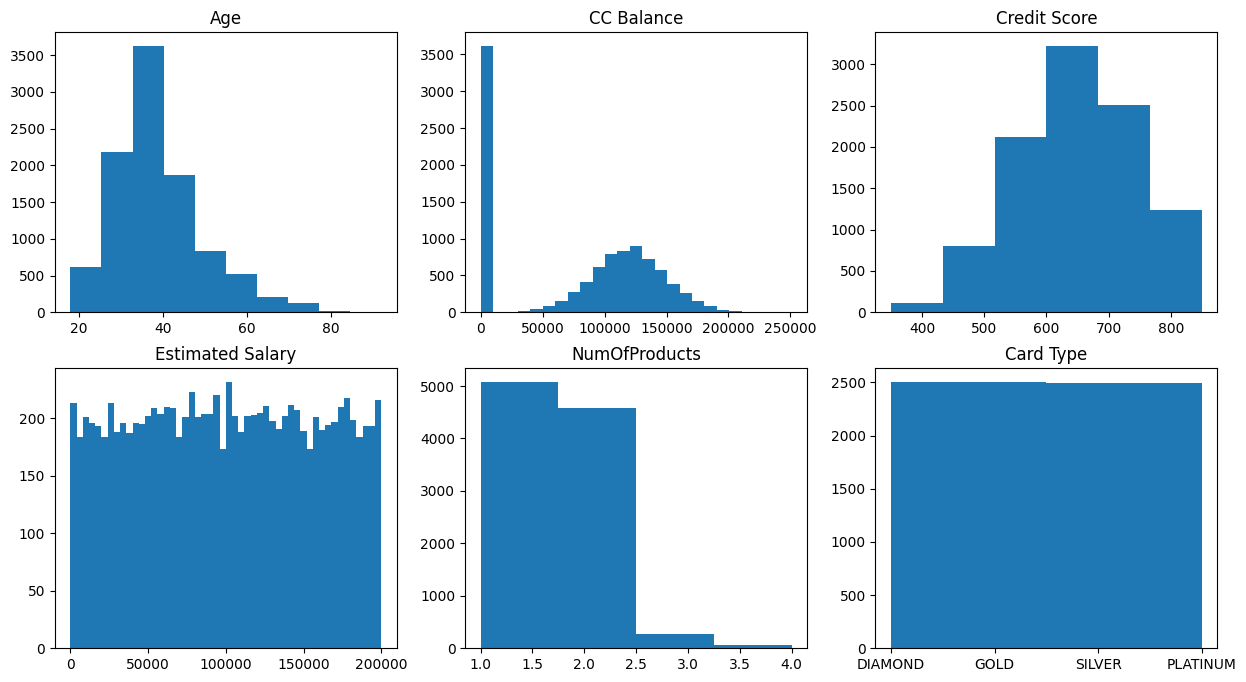

In [29]:
fig, ((ax0, ax1, ax2), (ax3, ax4,ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(15,8))



ax0.hist(churn_df['Age'], bins=10, histtype='bar')
ax0.set_title('Age')

ax1.hist(churn_df['Balance'], bins=25, histtype='bar')
ax1.set_title('CC Balance')

ax2.hist(churn_df['CreditScore'], bins=6, histtype='bar')
ax2.set_title('Credit Score')

ax3.hist(churn_df['EstimatedSalary'], bins=50, histtype='bar')
ax3.set_title('Estimated Salary')

ax4.hist(churn_df['NumOfProducts'], bins=4, histtype='bar')
ax4.set_title('NumOfProducts')

ax5.hist(churn_df['Card Type'], bins=4, histtype='bar')
ax5.set_title('Card Type')

#fig.tight_layout()
plt.show()

In [30]:
# Convert categorical data to numeric with `pd.get_dummies`

categories_encoded = pd.get_dummies(churn_df, columns=['Gender','Geography','Card Type'])

categories_encoded.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,1,0,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,1,0,0,0,1,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,1,0,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,1,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,1,0,0,0,1,0,1,0,0


In [31]:
categories_encoded.nunique()

CreditScore            460
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Satisfaction Score       5
Point Earned           785
Gender_Female            2
Gender_Male              2
Geography_France         2
Geography_Germany        2
Geography_Spain          2
Card Type_DIAMOND        2
Card Type_GOLD           2
Card Type_PLATINUM       2
Card Type_SILVER         2
dtype: int64

In [32]:
# Split our preprocessed data into our features and target arrays
y = categories_encoded["Exited"]
X= categories_encoded.drop(['Exited'],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [33]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimize the Model


In [34]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()
    features = len(X_train_scaled[0])


    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['tanh', 'relu', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=100,
        max_value=500,
        step=2), activation=activation, input_dim=features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=100,
            max_value=500,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [35]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="accuracy",
    max_epochs=15,
    hyperband_iterations=5,
    overwrite=True)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=4,validation_data=(X_test_scaled,y_test))

Trial 150 Complete [00h 00m 29s]
accuracy: 0.878000020980835

Best accuracy So Far: 0.9338666796684265
Total elapsed time: 00h 39m 28s


In [36]:
# Return the top 3 models to test
top_hyper = tuner.get_best_hyperparameters(1)
for param in top_hyper:
  print(param.values)

{'activation': 'relu', 'first_units': 198, 'num_layers': 3, 'units_0': 326, 'units_1': 210, 'units_2': 194, 'units_3': 238, 'units_4': 418, 'tuner/epochs': 15, 'tuner/initial_epoch': 5, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0108'}


## Compile, Train and Evaluate Model 1




In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = len(X_train_scaled[0])
layer1 = 198
layer2 = 326
layer3 = 210
layer4 = 194


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 198)               3960      
                                                                 
 dense_6 (Dense)             (None, 326)               64874     
                                                                 
 dense_7 (Dense)             (None, 210)               68670     
                                                                 
 dense_8 (Dense)             (None, 194)               40934     
                                                                 
 dense_9 (Dense)             (None, 1)                 195       
                                                                 
Total params: 178,633
Trainable params: 178,633
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [39]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
235/235 [==============================] - 4s 9ms/step - loss: 0.4167 - accuracy: 0.8243
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3511 - accuracy: 0.8563
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3345 - accuracy: 0.8659
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3254 - accuracy: 0.8684
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3141 - accuracy: 0.8720
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3043 - accuracy: 0.8772
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2920 - accuracy: 0.8849
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2827 - accuracy: 0.8849
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2671 - accuracy: 0.8885
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2519 - accur

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

79/79 - 0s - loss: 1.6957 - accuracy: 0.8276 - 297ms/epoch - 4ms/step
Loss: 1.6956740617752075, Accuracy: 0.8276000022888184


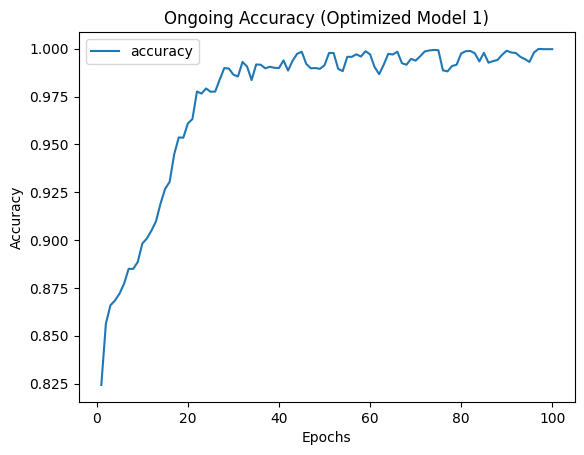

In [41]:
# Plot the ongoing accuracy over the epochs
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
plot = accuracy_df.plot(xlabel = 'Epochs', ylabel='Accuracy', y = 'accuracy', title='Ongoing Accuracy (Optimized Model 1)')
fig = plot.get_figure()

In [42]:
from sklearn.metrics import classification_report
import numpy as np

In [43]:
# Prediction
nn_model_prediction = nn.predict(X_test)
nn_model_classes =  [1 if i>0.5 else 0 for i in nn_model_prediction]
# Check the model performance
print(classification_report(y_test, nn_model_classes))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.69      0.74      1973
           1       0.25      0.39      0.31       527

    accuracy                           0.63      2500
   macro avg       0.53      0.54      0.53      2500
weighted avg       0.69      0.63      0.65      2500



In [44]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

# Obtain predicted probabilities for the test data
y_pred_proba = nn.predict(X_test)

# X_test is your test data
# Convert predicted probabilities to predicted class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# y_test is your true labels
print(f'accuracy:{accuracy_score(y_test, nn_model_classes)}')
print(f'balanced accuracy:{balanced_accuracy_score(y_test, nn_model_classes)}')

79/79 [==============================] - 0s 2ms/step
accuracy:0.6264
balanced accuracy:0.54009873327877
